In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load customer data (you can use your own dataset)
data = pd.read_csv('./data/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Select relevant features for profiling (e.g., age, income, spending habits)
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
features

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [4]:
# Standardize the data (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# scaled_features

In [5]:
# Determine the optimal number of clusters (Elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

inertia

[600.0,
 389.3861889564371,
 295.2122461555488,
 205.22514747675916,
 168.24758017556837,
 133.86833362685584,
 117.01155455889813,
 103.82857758796288,
 91.9568388542358,
 82.2457446656267]

In [6]:
len(inertia)

10

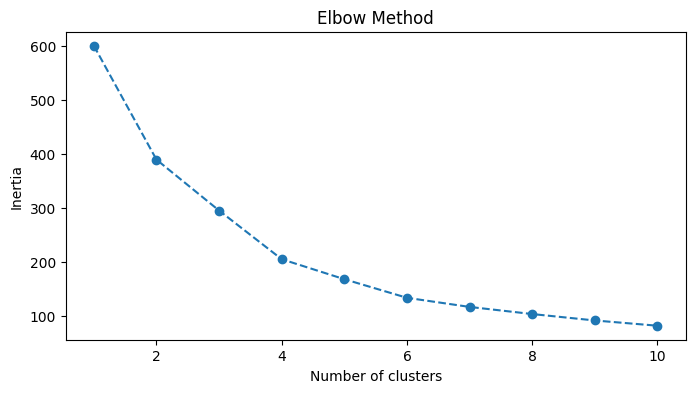

In [7]:
# Plot the Elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Based on the Elbow curve, choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)
cluster_labels

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [10]:
len(cluster_labels)

200

In [11]:
# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Analyze customer profiles
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [13]:
cluster_profiles = pd.DataFrame(cluster_centers, columns=['Age', 'Income', 'SpendingScore'])
cluster_profiles

,Age,Income,SpendingScore
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


In [17]:
# Print customer profiles for each cluster
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num + 1} Profile:")
    print(cluster_profiles.iloc[cluster_num])
    print()

# You can now use these profiles for targeted marketing or other business decisions.

Cluster 1 Profile:
Age              39.368421
Income           86.500000
SpendingScore    19.578947
Name: 0, dtype: float64

Cluster 2 Profile:
Age              25.438596
Income           40.000000
SpendingScore    60.298246
Name: 1, dtype: float64

Cluster 3 Profile:
Age              53.984615
Income           47.707692
SpendingScore    39.969231
Name: 2, dtype: float64

Cluster 4 Profile:
Age              32.875
Income           86.100
SpendingScore    81.525
Name: 3, dtype: float64



In [11]:
# data.columns
data['Cluster'].value_counts()

Cluster
2    65
1    57
3    40
0    38
Name: count, dtype: int64

**Performance Metrics**

The silhouette_score is a metric used to evaluate the quality of clusters created by a clustering algorithm like KMeans. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where:

* 1 indicates that the clusters are well-separated and the data points are appropriately clustered.
* 0 indicates that the data points are on or very close to the decision boundary between two neighboring clusters.
* -1 indicates that the data points might have been assigned to the wrong clusters.

In [43]:
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [44]:
silhouette_coefficients

[0.33547192894004574,
 0.35027143562558555,
 0.34983789408081173,
 0.41664341513732767,
 0.3926245613672707,
 0.42190482256145484,
 0.4093257483167767,
 0.37662187748041265,
 0.4162457571911426]

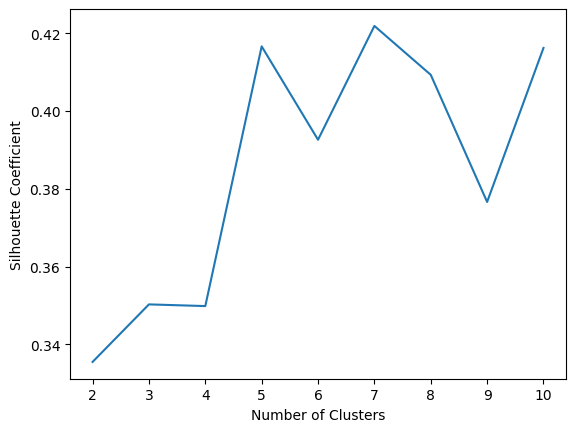

In [45]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [34]:
# Based on the Elbow curve, choose the optimal number of clusters (e.g., 4)
optimal_clusters = 6

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)
cluster_labels

array([5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 5,
       4, 5, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [27]:
# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Analyze customer profiles
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers, columns=['Age', 'Income', 'SpendingScore'])

# Print customer profiles for each cluster
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num + 1} Profile:")
    print(cluster_profiles.iloc[cluster_num])
    print()

# You can now use these profiles for targeted marketing or other business decisions.

Cluster 1 Profile:
Age              41.939394
Income           88.939394
SpendingScore    16.969697
Name: 0, dtype: float64

Cluster 2 Profile:
Age              56.333333
Income           54.266667
SpendingScore    49.066667
Name: 1, dtype: float64

Cluster 3 Profile:
Age              32.692308
Income           86.538462
SpendingScore    82.128205
Name: 2, dtype: float64

Cluster 4 Profile:
Age              26.684211
Income           57.578947
SpendingScore    47.789474
Name: 3, dtype: float64

Cluster 5 Profile:
Age              45.523810
Income           26.285714
SpendingScore    19.380952
Name: 4, dtype: float64

Cluster 6 Profile:
Age              25.250000
Income           25.833333
SpendingScore    76.916667
Name: 5, dtype: float64

